# Context
What is a gemstone? A gemstone (gem, fine gem, jewel, precious stone, or semi-precious stone) is a piece of mineral crystal which, in cut and polished form, is used to make jewelry or other adornments. Certain rocks (such as lapis lazuli and opal) and occasionally organic materials that are not minerals (such as amber, jet, pearl) are also used for jewelry and are therefore often considered to be gemstones as well (source: [wiki](https://en.wikipedia.org/wiki/Gemstone)).

A few gemstones are used as gems in the crystal or other form in which they are found. Most however, are cut and polished for usage as jewelry. 

![](https://lh3.googleusercontent.com/proxy/oKyVDQ5e2whCQYHdmOhN6FopacGApwNz9NxAy2WRToIj3Bhs82Z7vY94GjwPueOCtgTKmgXCOhgHUJVEF6h3JS2EPBeI9Mus3TfIZZa6FhLOW6rqZY1ewMWXVKjYpo6Ixw)

I have already collected the dataset of [gemstones images](https://www.kaggle.com/lsind18/gemstones-images) with 3.200+ images of faceted gems. Gemstones' images are grouped into 87 classes with division into train and test data in ratio ~ 0,9 : 0,1. The images are in various sizes of .jpg format. All gemstones are faceted in various shapes - round, oval, square, rectangle, heart. 

## todo:: Build a simple convolutional neural network from scratch over the dataset of [gemstones images](https://www.kaggle.com/lsind18/gemstones-images).
### <font color='red'>If you like this notebook please upvote! Have fun</font> 🌟   

* Before we start the science, watch this short video to know how our beautiful nature forms gemstones:

In [1]:
from IPython.display import HTML
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/6YXKt0bMBJA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

# Preparation steps

# I. Import necessary modules

* `import os`: to read files from disk
* `import cv2`: OpenCV is an image and video processing library  
* `import matplotlib.pyplot as plt` and `import seaborn as sn`: to show images and graphs
* `from random import randint`: to show random images
* `import numpy as np`: linear algebra; all images will represent numpy-arrays.
* other modules and their components will be imported later.

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

# I. Check data 

First, check the number of files in every gemstone class in folder `/kaggle/input/gemstones-images`. Images are already divided into train (~2,800 images) and test (~400 images) data. Each class in train set contains `27 - 47` images, in test set - `4 - 6` images.
* create list `CLASSES` which contains the names of 87 classes of gemstones based on folders names;
* plot the distribution of data;
* *uncomment block of code if you want a text output about each subfolder*.

87 classes with 3219 images in total


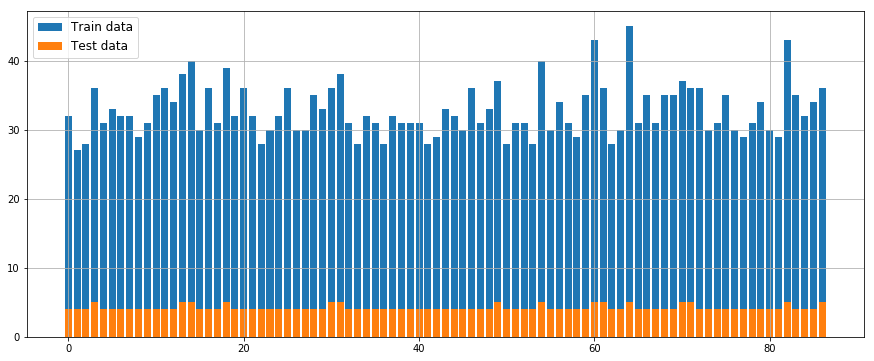

In [3]:
CLASSES, gems = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/kaggle/input/gemstones-images'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc    
        
    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0)) 
    
gems_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

f, ax = plt.subplots(figsize=(15,6))
if(gems[0])<10:
    plt.bar(range(gems_count), gems[gems_count:], label = 'Train data')
    plt.bar(range(gems_count), gems[0:gems_count], label = 'Test data')
else:
    plt.bar(range(gems_count), gems[0:gems_count], label = 'Train data')
    plt.bar(range(gems_count), gems[gems_count:], label = 'Test data')
ax.grid()
ax.legend(fontsize = 12);

Orange small bars represent test data and blue bars represent train data. Data is normally distributed.

# II. Prepare training data

## 1. Prepare parameters

* resize processed images to `img_w, img_h` - this option will be used when cropped and as a parameter of neural network; 
* provide train directory path.

In [4]:
img_w, img_h = 220, 220    # width and height of image
train_dir = '/kaggle/input/gemstones-images/train/'

## 2. Create function which reads images and class names
* this function will be also used with test images;
* read each image from disk using `cv2` and resize it to `img_w*1.5, img_h*1.5`;
* set `cv2.COLOR_BGR2RGB` option because opencv reads and displays an image as BGR color format instead of RGB color format. Without this option images will be shown in blue hue because `matplotlib` uses RGB to display image;
* create a list of class names while reading folders - `Amethyst, Onyx, etc`;
* when `Images` list is ready - convert it to Numpy array;
* return tuple of 2 elements: Images and corresponding Labels.

In [5]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

## 3. Create function which converts string labels to numbers
* Convert string labels to a list of numbers using list `CLASSES`. The index will represent label of class, f.e. *Ruby = 0, Amethyst = 24*, etc.
* when `Labels` list is ready - convert it to Numpy array.

In [6]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

## 4. Fill arrays of Images and corresponding Labels with data
* Create two arrays `Train_Imgs, Train_Lbls` which contain images and corresponding names of classes of gemstones respectively;
* Convert `Train_Lbls` with strings to list with corresponding numbers;
* print the dimensions of both numpy arrays: `Train_Imgs` which stores pictures is 4-dimensional: **Number of images x Width of image x Height of image x Channel of image**.

In [7]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (2856, 330, 330, 3)
Shape of train labels: (2856,)


## 5. Plot images and their labels for preview
* Using `matplotlib` and `random` show 16 (4x4) random images from the set and their labels (as string and as int number).

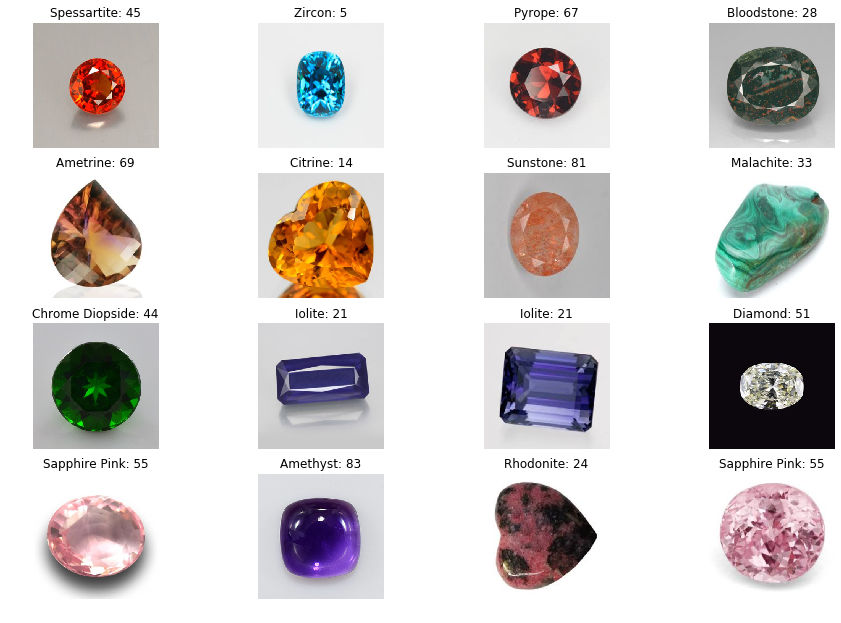

In [8]:
dim = 4 #you can change it;  4x4 dimension flat plot

f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

From 4x4 plot above we can see that gemstones are mostly centered; but let's try to crop the edges.

## 6. Crop edges of images using Canny algorithm
> Canny is a popular edge detection algorithm, which detects the edges of objects present in an image.

* Using `cv2.Canny` find the array representing frame which is the edges how the original picture will be cut;
* Function `edge_and_cut(img)` receives single image and returns a **cropped image (`new_img`)** of the size `img_w, img_h`;
* sometimes Canny algo cannot detect edges (f.e. when the object has almost same color as background) so array `edges` will be zero-valued. In this case use original image.

In [9]:
def edge_and_cut(img):
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        
        if(np.count_nonzero(edges)>edges.size/10000):           
            pts = np.argwhere(edges>0)
            y1,x1 = pts.min(axis=0)
            y2,x2 = pts.max(axis=0)
            
            new_img = img[y1:y2, x1:x2]           # crop the region
            new_img = cv2.resize(new_img,(img_w, img_h))  # Convert back
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    return new_img

## 7. Show cropped images
* Function `show_cropped` is kind-of duplicate `edge_and_cut()`: it shows same random examples of Canny algo work: **original image, Canny edges, image with bounding box, cropped image** for better understanding how Canny algo works.

In [10]:
def show_cropped(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, img_w, img_h)
    
    if(np.count_nonzero(edges)>edges.size/10000):
        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        new_img = img[y1:y2, x1:x2]  

        edge_size = 1 #replace it with bigger size for larger images            

        emb_img[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
        emb_img[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

        new_img = cv2.resize(new_img,(img_w, img_h))  # Convert to primary size  
        
    else:
        new_img = cv2.resize(img,(img_w, img_h))
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=14)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=14)       
    ax[3].imshow(new_img, cmap='gray')
    ax[3].set_title('Cropped', fontsize=14)   

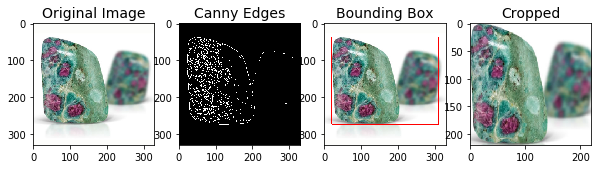

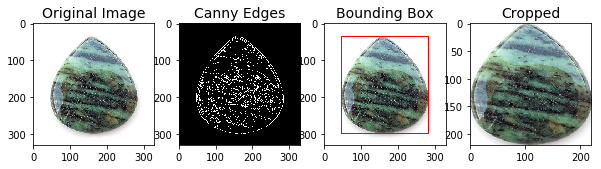

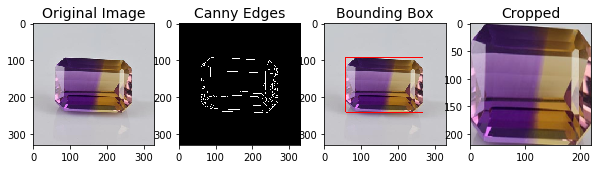

In [11]:
for x in range(0,3):
    show_cropped(Train_Imgs[randint(0,len(Train_Imgs))])

## 8. Replace train images with cropped images
* Create function which calls `edge_and_cut` and replaces `Train_Imgs` numpy array with array of cropped images. Don't forget that images that cannot be cropped will be replced with originals;
* Make sure the shape of final array is the same: NUMBER OF IMAGES x img_w x img_h x 3 (CHANNELS):

In [12]:
def crop_images(Imgs):
    CroppedImages = np.ndarray(shape=(len(Imgs), img_w, img_h, 3), dtype=np.int)

    ind = 0
    for im in Imgs: 
        x = edge_and_cut(im)
        CroppedImages[ind] = x
        ind += 1

    return CroppedImages

In [13]:
Train_Imgs = crop_images(Train_Imgs)
print('Final shape of images in train set: {} '.format(Train_Imgs.shape))

Final shape of images in train set: (2856, 220, 220, 3) 


## 9. Split data into train and validation sets
* use `sklearn` to split `Train_Imgs`, `Train_Lbls` into train (80%) and validation (20%) sets. **Important!**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (2284, 220, 220, 3), y_train: (2284,) 
Shape of X_val: (572, 220, 220, 3), y_val: (572,) 


# III. Prepare for model creation
## 1. Check devices

Using `tensorflow` check which devices uses the Kaggle platform.

`XLA_CPU device`: CPU  
`XLA_GPU device`: Tesla P100-PCIE-16GB (to accelerate computing use GPU mode).  
XLA stands for *accelerated linear algebra*. It's Tensorflow's relatively optimizing compiler that can further speed up ML models.  

Run this notebook with GPU mode: for example, using image size 190 x 190 and basic architecture of CNN mentioned above every epoch on CPU takes ~3 minutes, on GPU ~ 15 sec.

In [15]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4899198650595124990
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1830463915844833712
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9589940491512316861
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15876469556
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1957222969318955357
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


## 2. Import keras
Keras is an open-source neural-network library written in Python which is capable of running on top of **TensorFlow**.
From Keras needed:
* `models` - type of models, import only `Sequential` 
* `layers` - layers corresponding to our model: as it a simple one take only `Conv2D`, `MaxPooling2D` and `AveragePooling2D`
* `optimizers` - contains back propagation algorithms
* `ImageDataGenerator` - for image augmenation (there are not so many samples of each class)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

Using TensorFlow backend.


# Build a simple CNN  
CNN (Convolutional neural network or ConvNet) is a class of deep neural networks, commonly applied to analyzing visual imagery. Here is the simpliest example of CNN with few layers using `Conv2D` - 2D convolution layer (spatial convolution over images) and `MaxPooling2D` - application of a moving window across a 2D input space.

# I. Provide Hyperparameters
Hyperparameters are set before training; they represent the variables which determines the neural network structure and how the it is trained.  
  
## 1. Parameters for layers
* Convolutional layer filter size (`filters`). The number of filters should depend on the complexity of dataset and the depth of neural network. A common setting to start with is [32, 64, 128] for three layers.  
* `kernel_size` = number of filters  = a small window of pixels at a time (3×3) which will be moved until the entire image is scanned. If images are smaller than 128×128, work with smaller filters of 1×1;
* Width and Height of images were already provided. 2D convolutional layers take a three-dimensional input, typically an image with three color channels;
* `max_pool` = max pooling is the application of a moving window across a 2D input space, where the maximum value within that window is the output: 2x2. 

In [17]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

## 2. Parameters to fit the model
* **epoch** describes the number of times the algorithm sees the ENTIRE dataset. Each time the algo has seen all samples in the dataset, an epoch has completed.  
* since one epoch is too big to feed to the memory at once divide it in several smaller **batches**. Batch size is always factor of 2. 
* **Iterations** per epoch = number of passes, each pass using batch size number of examples.   

So if we have ~2200 (80%) training samples, and batch size is 32, then it will take ~70 iterations to complete 1 epoch.

In [18]:
EPOCHS = 70                                  # while testing you can change it
batch_size = 32                              # number of training samples using in each mini batch during GD (gradient descent) 
iter_per_epoch = len(X_train) // batch_size  # each sample will be passed [iter_per_epoch] times during training
val_per_epoch = len(X_val) // batch_size     # each sample will be passed [val_per_epoch] times during validation

# II. Provide a model

## 1. Architect a model
The Sequential model is a linear stack of layers.
* I use a kind of VGG network architecture:

|   |       Layers       |
|:-:|:------------------:|
| 1 |  Conv2D 32 -> Pool |
| 2 |  Conv2D 64 -> Pool |
| 3 | Conv2D 128 -> Pool |
| 4 | Conv2D 128 -> Pool |
| 5 | Conv2D 128 -> Pool |
| 6 |        FLAT        |
| 7 |        Drop        |
| 8 |      Dense 512     |
| 9 | Dense len(CLASSES) |


1. ADD 5 'blocks': 
   *  Conv2D with hypermarameters mantioned above: `Conv2D(kernel_size, (filters, filters), input_shape=(img_w, img_h, 3))` with activation function for each layer as a Rectified Linear Unit (ReLU): `Activation('relu')`  
   * MaxPooling2D layer to reduce the spatial size of the incoming features; 2D input space: `MaxPooling2D(pool_size=(max_pool, max_pool))`  
   * Do the same increading the kernel size: 32 -> 64 -> 128 -> 128 -> 128

2. Flatten the input: transform the multidimensional vector into a single dimensional vector: `Flatten()`
3. Add dropout layer which randomly sets a certain fraction of its input to 0 and helps to reduce overfitting: `Dropout(0.5)`
5. Add fully connected layer with 512 nodes and activation function relu: `Dense(512), Activation('relu')`
6. Provide last fully connected layer which specifies the number of classes of gemstones: **87**. `Softmax` activation function outputs a vector that represents the probability distributions of a list of potential outcomes: `Dense(87, activation='softmax')`   


* Print the summary of the model.

In [19]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(87, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 128)      

The model summary shows that there are more than 2M parameters to train and the information about different layers.

## 2. Compile a model
* Compile the model using `adam` optimizer which is a generalization of stochastic gradient descent (SGD) algo. Provided loss function is `sparse_categorical_crossentropy` as we are doing multiclass classification.   

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# III. Fit the train generator

## 1. Image augmentation
> **Image augmentation** is a creation of additional training data based on existing images, for example translation, rotation, flips and zoom.

* As far as there are not so many samples for every class add a train data generator using class `ImageDataGenerator` with augmentation parameters. Using `ImageDataGenerator` class from Keras library create additional images of each gemstone class in the memory.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

* the original image + examples of work of `ImageDataGenerator`: 

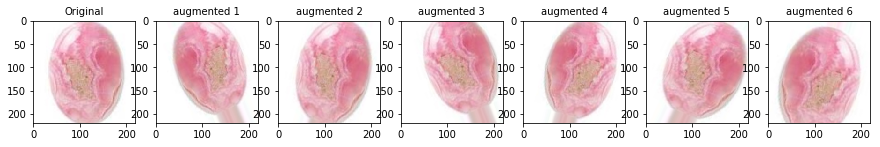

In [22]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

Create two numpy array iterators `train_gen` and `val_gen` and fill them with additional images:

In [23]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

## 2. Fit the model
* get a history object
* If you see that `val_los` parameter is increasing that is *overfitting*. It happens when your model explains the training data too well, rather than picking up patterns that can help generalize over unseen data.

In [24]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
       )

Epoch 1/70
71/71 [==============================] - 26s 360ms/step - loss: 5.2909 - accuracy: 0.0364 - val_loss: 3.8485 - val_accuracy: 0.0423
Epoch 2/70
71/71 [==============================] - 25s 353ms/step - loss: 3.4145 - accuracy: 0.1159 - val_loss: 2.7371 - val_accuracy: 0.1889
Epoch 3/70
71/71 [==============================] - 23s 322ms/step - loss: 2.7974 - accuracy: 0.2167 - val_loss: 2.6321 - val_accuracy: 0.2333
Epoch 4/70
71/71 [==============================] - 23s 319ms/step - loss: 2.5033 - accuracy: 0.2664 - val_loss: 2.5391 - val_accuracy: 0.2926
Epoch 5/70
71/71 [==============================] - 24s 340ms/step - loss: 2.2983 - accuracy: 0.3091 - val_loss: 2.6524 - val_accuracy: 0.3130
Epoch 6/70
71/71 [==============================] - 23s 324ms/step - loss: 2.1509 - accuracy: 0.3508 - val_loss: 2.4501 - val_accuracy: 0.3574
Epoch 7/70
71/71 [==============================] - 25s 354ms/step - loss: 2.0295 - accuracy: 0.3702 - val_loss: 1.6725 - val_accuracy: 0.3907

**ALMOST DONE!** 😈   

## 3. Check the accuracy

* plot the accuracy of model against size of epoch (train and val);
* plot the loss of model against size of epoch (train and val).

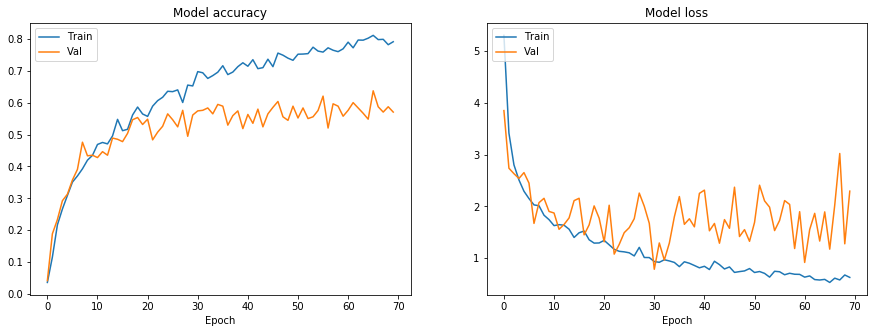

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

* there is an overfitting: even though train and val accuracy are pretty close to each other, `val_loss` parameter often 'jumps'.

## 4. Score the model
> Accuracy is a metric for evaluating classification models. `Accuracy  = Number of right predictions / Total number of predictions`.

* Function `evaluate_generator` evaluates the model on a data generator: `score` is a list of scalars (loss and accuracy).

In [26]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

loss:2.520139455795288
accuracy:0.5804196000099182


The accuracy of a model from scratch ~ 65%. Any suggestions on improving a model are taking up 😊

## 5. Confusion matrix   
> Confusion matrix can be pretty useful when evaluating multiclass classifications.   

* `from sklearn.metrics import confusion_matrix`: Diagonal of matrix should be mostly filled with numbers.

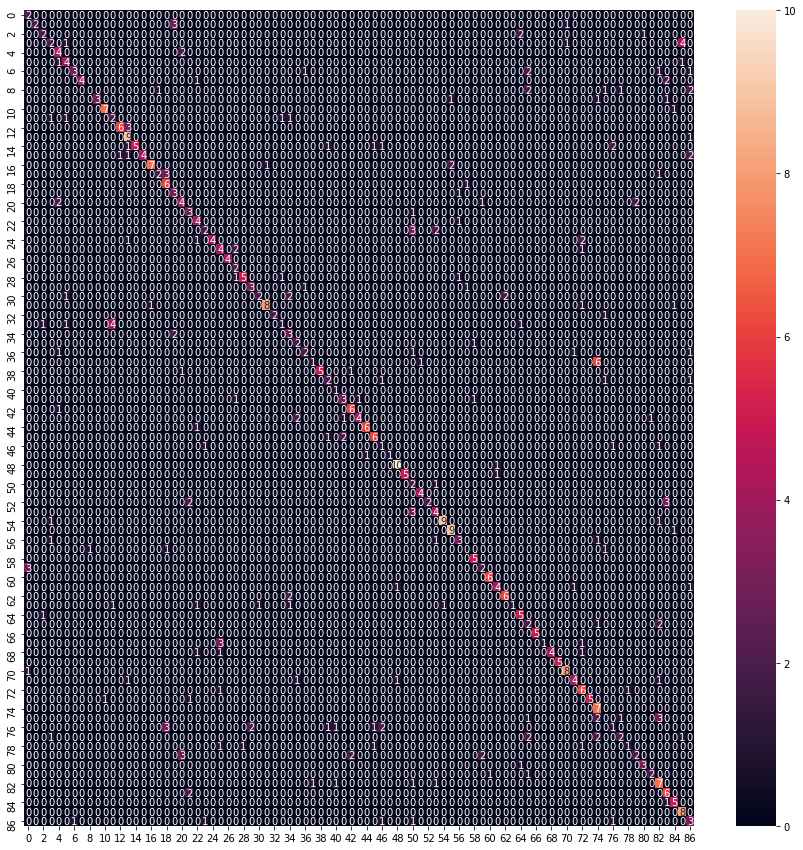

In [27]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

Because of great amount of classes just **plot misclassified gemstones by model**. `numpy.argmax()` function returns the indices of maximum elements along the specific axis inside the array (`axis = 1` - 'horizontally').
* Create a list of misclassified indexes which will be substitued into validation set `X_val`.  
* Plot misclassified gemstones.

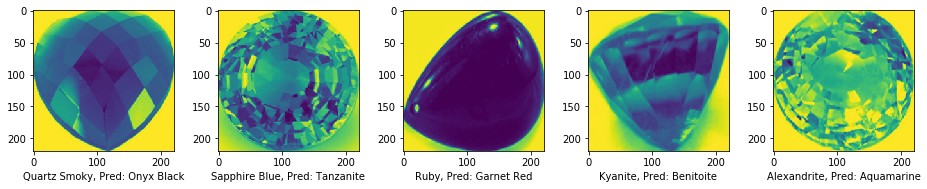

In [28]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(CLASSES[y_val[x[i]]],CLASSES[y_pre_test[x[i]]]))

Don't judge poor model. Just look at `Almandine`, `Garnet Red`, `Hessonite`, `Pyrope` and `Rhodolite`. Can you distinguish between them?

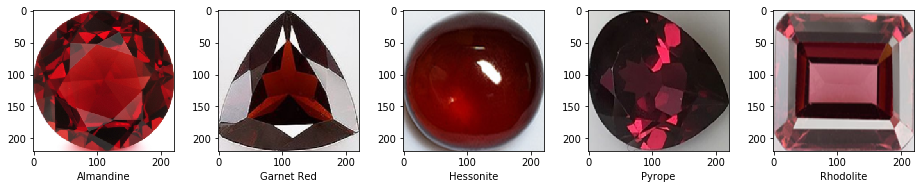

In [29]:
red_stones = ['Almandine', 'Garnet Red', 'Hessonite', 'Pyrope', 'Rhodolite']
red_stones = get_class_index(red_stones)

fig,ax=plt.subplots(1,len(red_stones),sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(len(red_stones)):
    ax[i].imshow(Train_Imgs[np.where(Train_Lbls==red_stones[i])[0][1]])
    ax[i].set_xlabel(CLASSES[red_stones[i]])

## 6. Save the model
* Save weights to reuse them instead of training again. Keras function `save` creates h5 file with weights. Use `new_model.load_weights('model_gemstones.h5')` to reuse it in other models.

In [30]:
model.save('model_gemstones.h5')

# IV. Evaluate on testing folder

## 1. Get samples from test folder
Create test data generator using class `ImageDataGenerator` and validate it providing the test directory `'/kaggle/input/gemstones-images/test/'`

In [31]:
test_dir = '/kaggle/input/gemstones-images/test/'

Create `Test_Imgs` and `Test_Lbls` absolutely the same as we did with training folder. Convert them to numpy arrays - there are 358 images for test. `Test_Lbls` array will help to check is the model predictions are correct.

In [32]:
Test_Imgs, Test_Lbls = read_imgs_lbls(test_dir)
Test_Lbls = get_class_index(Test_Lbls)

## 2. Crop test images

In [33]:
Test_Imgs = crop_images(Test_Imgs)
print('shape of images in test set: {} '.format(Test_Imgs.shape))

shape of images in test set: (363, 220, 220, 3) 


## 2. Plot test images and model predictions
Plot image from test folder with a label, class which model predicted, and actual class.

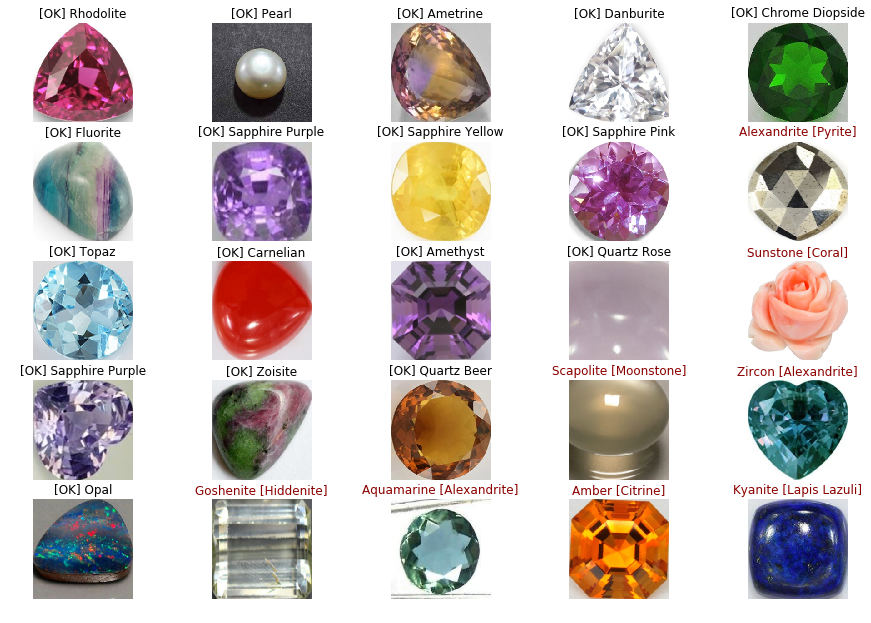

In [34]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Test_Imgs))
        pred_image = np.array([Test_Imgs[rnd_number]])
        pred_class = model.predict_classes(pred_image)[0]
        pred_prob = model.predict(pred_image).reshape(87)
        act = CLASSES[Test_Lbls[rnd_number]]
        ax[i,j].imshow(Test_Imgs[rnd_number])
        ax[i,j].imshow(pred_image[0])
        if(CLASSES[pred_class] != CLASSES[Test_Lbls[rnd_number]]):
            t = '{} [{}]'.format(CLASSES[pred_class], CLASSES[Test_Lbls[rnd_number]])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[OK] {}'.format(CLASSES[pred_class]) 
            ax[i,j].set_title(t)
        ax[i,j].axis('off')

# Conclusion

The model tries! Finally it understands the color: some gemstones are really similar.  


![Diamonds? really?](https://cdn.leibish.com/media/mediabank/blue-diamond-scale_1634.c8fbb.jpg)


### **Please upvote this kernel if you find it useful** 🙋  
Feel free to give any suggestions to improve my code.